<a href="https://colab.research.google.com/github/Ravi-ranjan1801/DIP-Lab-/blob/main/dip_lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DIP LAB - 02**

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# **Experiment - 01 : Perform sampling and quantization on a synthetic image**

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

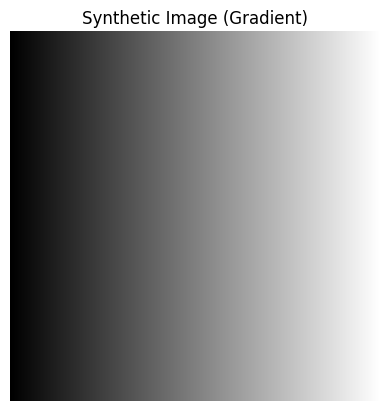

In [15]:
# Create a synthetic 256x256 gradient image
synthetic = np.tile(np.arange(256, dtype=np.uint8), (256, 1))

plt.imshow(synthetic, cmap='gray')
plt.title("Synthetic Image (Gradient)")
plt.axis('off')


(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

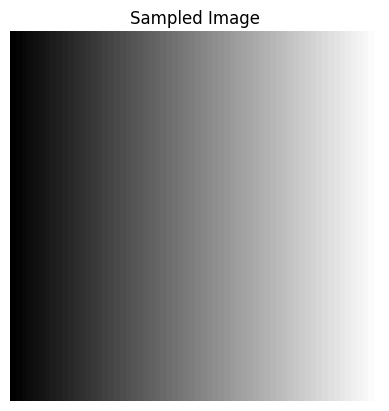

In [16]:
sampled = synthetic[::4, ::4]   # downsampling

plt.imshow(sampled, cmap='gray')
plt.title("Sampled Image")
plt.axis('off')


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

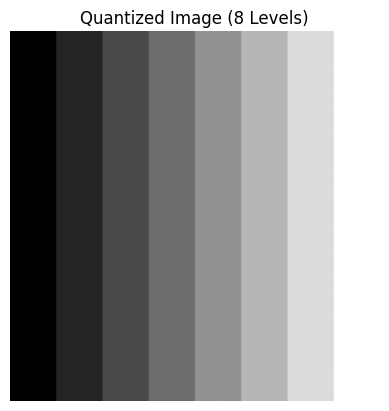

In [17]:
levels = 8
quantized = (synthetic // (256 // levels)) * (256 // levels)

plt.imshow(quantized, cmap='gray')
plt.title("Quantized Image (8 Levels)")
plt.axis('off')


# **Experiment - 02 : Distance measures (De, D4, D8) from (200,300) and (700,900)**

In [18]:
p1 = np.array([200, 300])
p2 = np.array([700, 900])

dx = abs(p1[0] - p2[0])
dy = abs(p1[1] - p2[1])

De = np.sqrt(dx**2 + dy**2)      # Euclidean
D4 = dx + dy                    # City block
D8 = max(dx, dy)                # Chessboard

print("Euclidean Distance (De):", De)
print("City Block Distance (D4):", D4)
print("Chessboard Distance (D8):", D8)


Euclidean Distance (De): 781.0249675906655
City Block Distance (D4): 1100
Chessboard Distance (D8): 600


# **Experiment - 03 : Image Negation, Log & Power Law (Gamma) Transformation**

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

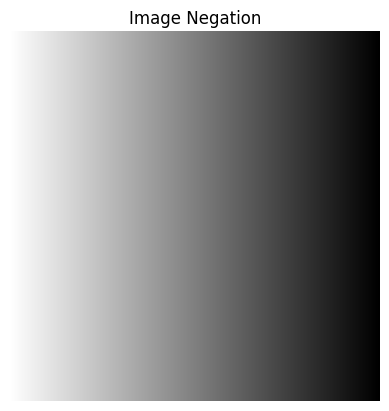

In [19]:
negative = 255 - synthetic

plt.imshow(negative, cmap='gray')
plt.title("Image Negation")
plt.axis('off')


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

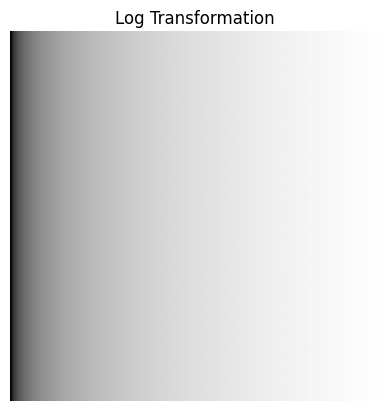

In [20]:
# Convert to float to avoid overflow
synthetic_float = synthetic.astype(np.float32)

# Log transformation
c = 255 / np.log(1 + np.max(synthetic_float))
log_img = c * np.log(1 + synthetic_float)

# Convert back to uint8
log_img = np.uint8(log_img)

plt.imshow(log_img, cmap='gray')
plt.title("Log Transformation")
plt.axis('off')



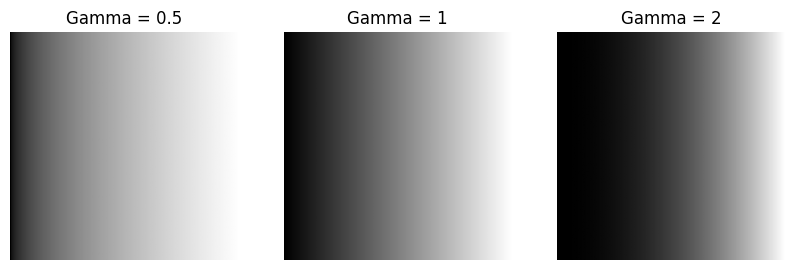

In [21]:
gammas = [0.5, 1, 2]

plt.figure(figsize=(10,3))
for i, g in enumerate(gammas):
    gamma_img = np.uint8(255 * (synthetic / 255) ** g)
    plt.subplot(1,3,i+1)
    plt.imshow(gamma_img, cmap='gray')
    plt.title(f"Gamma = {g}")
    plt.axis('off')


# **Experiment - 04 :Intensity Level Slicing & Bit Plane Slicing**

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

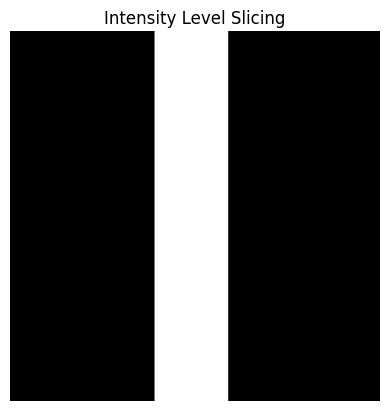

In [22]:
sliced = np.zeros_like(synthetic)
sliced[(synthetic >= 100) & (synthetic <= 150)] = 255

plt.imshow(sliced, cmap='gray')
plt.title("Intensity Level Slicing")
plt.axis('off')


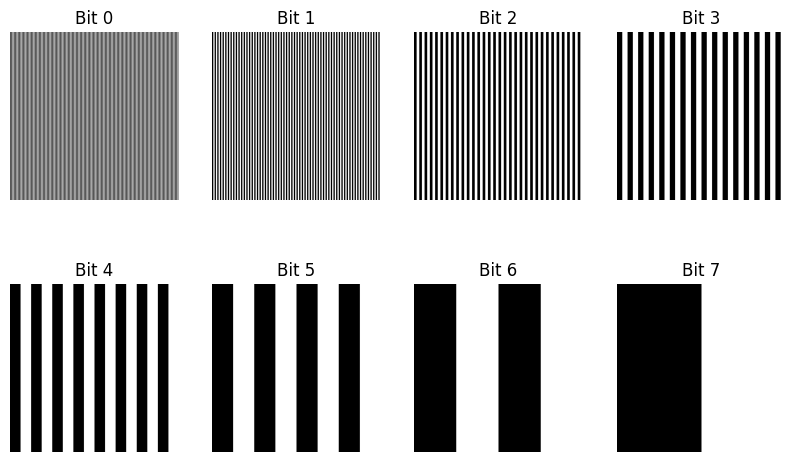

In [23]:
plt.figure(figsize=(10,6))
for i in range(8):
    bit_plane = (synthetic >> i) & 1
    plt.subplot(2,4,i+1)
    plt.imshow(bit_plane, cmap='gray')
    plt.title(f"Bit {i}")
    plt.axis('off')


# **Experiment - 05 : Contrast Stretching**

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

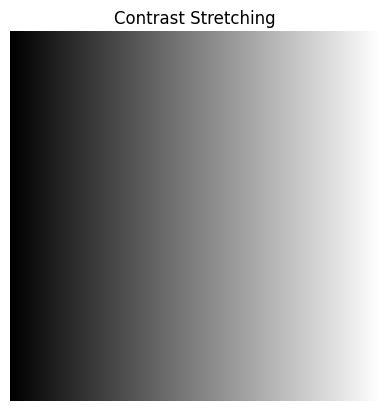

In [24]:
r_min, r_max = synthetic.min(), synthetic.max()
contrast = (synthetic - r_min) * (255 / (r_max - r_min))
contrast = np.uint8(contrast)

plt.imshow(contrast, cmap='gray')
plt.title("Contrast Stretching")
plt.axis('off')


# **Experiment - 06 : Histogram Equalization**

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

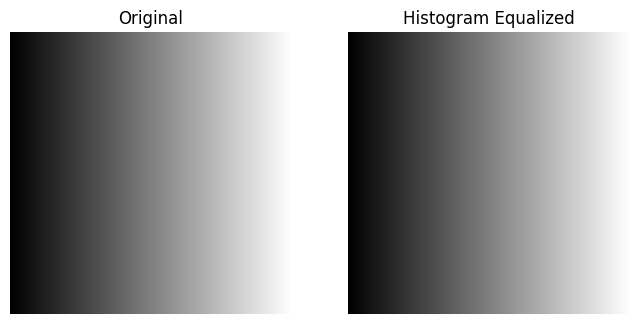

In [25]:
equalized = cv2.equalizeHist(synthetic)

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(synthetic, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized")
plt.axis('off')
